In [ ]:
import numpy as np
from copy import deepcopy

In [ ]:

def reflect_tuples(A):
    B = [(y, x) for (x, y) in A]
    B = sorted(B)
    return B
def sp_tree_tuples(A, Sd, Ss, used, t, K, M,winners):
    for k in Sd.keys():
        if k >= t:
            for x in Sd[k]:
              if x not in A:
                Ac = deepcopy(A)
                Sdc = deepcopy(Sd)
                Ssc = deepcopy(Ss)
                usedc = deepcopy(used)
                tc = k
                Ac.append(x)
                Ac = sorted(Ac)
                if not (Ac in usedc) and not (reflect_tuples(Ac) in usedc):
                    usedc.append(Ac)
                    for y in Ac:
                        z = (x[0] + y[0], x[1] + y[1])

                        if z not in Ssc:
                         Ssc.add(z)
                         q = z[0] + z[1]
                         if q in Sdc.keys():
                          Sdc[q].add(z)
                         else: Sdc[q] = {z}


                    T = len(Ssc)
                    j = len(Ac)
                    if j == K:
                      if T<= M and Ac not in winners and reflect_tuples(Ac) not in winners:
                        winners.append(Ac)
                    else:
                      if T <= M:
                        sp_tree_tuples(Ac, Sdc, Ssc, usedc, tc, K, M,winners)

This is the exact same code you wrote yesterday with two small changes:

1. Since we gave up on using numpy arrays (the advantage was they are easy to add together, but they caused too many headaches to be worth it), it makes more sense for our ordered pairs to be 'tuples' (like (0,0)) instead of 'lists' like [0,0]. This has the advantage that tuples are 'hashable', so we can use actual 'sets' containing them, which avoids some of the hoops we had to jump through in the previous code.

2. Before adding a finished, qualifying set to the list of 'winners', this code checks if it is already there. The code from yesterday does a good job testing for repeats along the way, but does not test for repeats at the very end.

Also, notice that it takes 'winners' as an input. That is just for the purposes of the next function that does the 'resetting' automatically.

In [ ]:
def run_sp_tree_tuples(K,M):
  A = [(0, 0), (1, 0), (0, 1)]
  Sd = {0: {(0, 0)}, 1: {(1, 0), (0, 1)}, 2: {(2, 0), (1, 1), (0, 2)}}
  used = [A]
  winners = []
  Ss = set([(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (0, 2)])
  sp_tree_tuples(A, Sd, Ss, used, 2, K, M, winners)
  return winners

This function does some of the work of 'resetting' that was bogging us down yesterday. Just run this function with the desired set size K and the desired sumset bound M, and it returns the list of winners. If you want that list of winners to be stored rather than just printed, give it a name like

winners1029 = run_sp_tree_tuples(10,29)

And then the resulting list of winners is stored in the variable winners1029.

In [ ]:
winners821 = run_sp_tree_tuples(8,21)

In [ ]:
winners821

[[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)],
 [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (4, 0)],
 [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 1), (4, 1)],
 [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (3, 0), (4, 0), (5, 0)],
 [(0, 0), (0, 1), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5)],
 [(0, 0), (0, 1), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0)]]

In [ ]:
winners1029 = run_sp_tree_tuples(10,29)

In [ ]:
len(winners1029)

56

In [ ]:
winners1029

[[(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (3, 0)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (2, 2)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 1),
  (1, 2),
  (1, 3),
  (2, 0),
  (2, 1)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (1, 0),
  (1, 1),
  (1, 2),
  (1, 3),
  (2, 0)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (2, 2),
  (3, 1)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (2, 2),
  (2, 3)],
 [(0, 0),
  (0, 1),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (3, 0),
  (3, 1),
  (4, 0)],
 [(0, 0),
  (0, 1),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (2, 2),
  (3, 0),
 

In [ ]:
winners1133 = run_sp_tree_tuples(11,33)

In [ ]:
len(winners1133)

159

In [ ]:
winners1133

[[(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (3, 0),
  (4, 0)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (3, 0),
  (3, 1)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (2, 2),
  (3, 0)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (2, 2)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (1, 0),
  (1, 1),
  (1, 2),
  (1, 3),
  (2, 0),
  (2, 1)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (2, 2),
  (3, 1)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 1),
  (1, 2),
  (1, 3),
  (2, 0),
  (2, 1),
  (2, 2)],
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 1),
  (1, 2),
  (2, 0),
  (2, 1),
  (2, 2),
  (2, 3)],
 

In [ ]:
len(winners1133)

NameError: name 'winners1133' is not defined

In [ ]:
winners925 = run_sp_tree_tuples(9,25)

In [ ]:
winners925

[[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1)],
 [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (2, 0)],
 [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)],
 [(0, 0), (0, 1), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (2, 3)],
 [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1), (4, 0)],
 [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1), (4, 1)],
 [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (4, 0), (5, 0)],
 [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0)],
 [(0, 0), (0, 1), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)],
 [(0, 0), (0, 1), (1, 0), (2, 0), (2, 1), (3, 0), (4, 0), (5, 0), (6, 0)],
 [(0, 0), (0, 1), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0)],
 [(0, 0), (0, 1), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (8, 0)]]

In [ ]:
len(winners925)

13

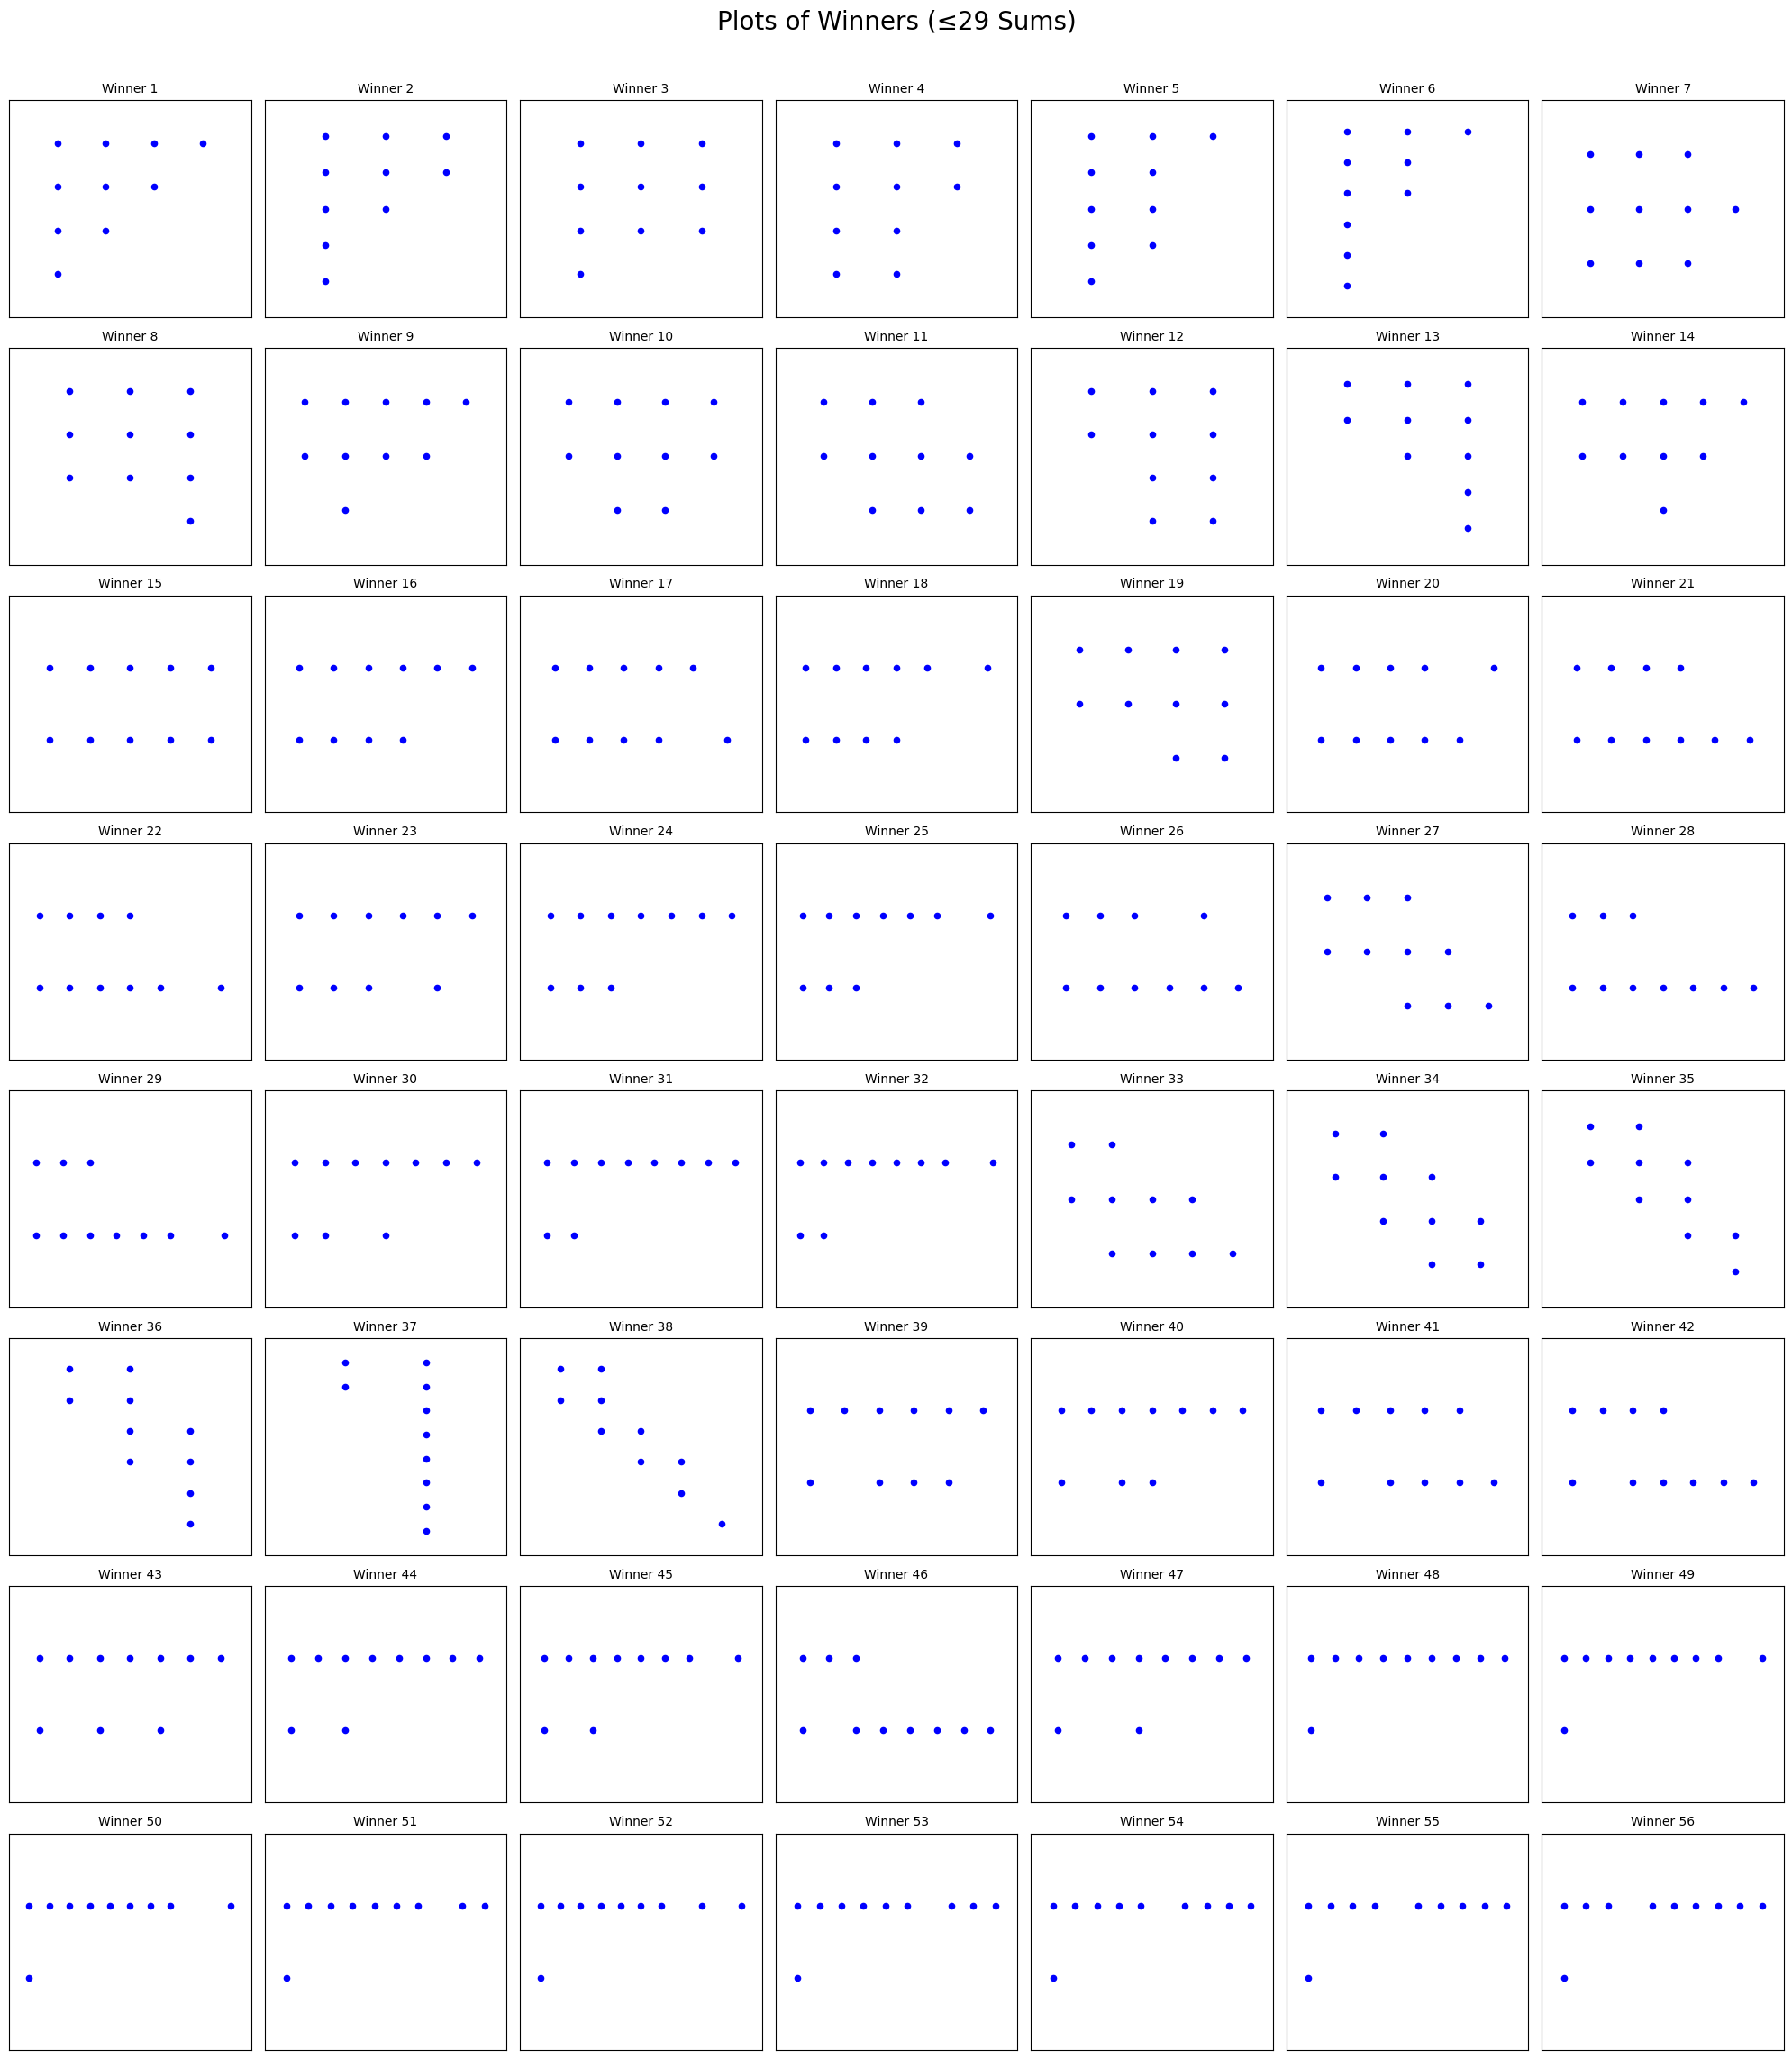

In [ ]:
import matplotlib.pyplot as plt



fig, axs = plt.subplots(8, 7, figsize=(20, 24))
fig.suptitle("Plots of Winners (≤29 Sums)", fontsize=20)

for i, winner in enumerate(winners1029):
    ax = axs[i // 7, i % 7]
    x_vals = [t[0] for t in winner]
    y_vals = [t[1] for t in winner]
    ax.scatter(x_vals, y_vals, c='blue', s=20)
    ax.set_title(f"Winner {i+1}", fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(min(x_vals, default=0) - 1, max(x_vals, default=1) + 1)
    ax.set_ylim(min(y_vals, default=0) - 1, max(y_vals, default=1) + 1)
    ax.invert_yaxis()

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

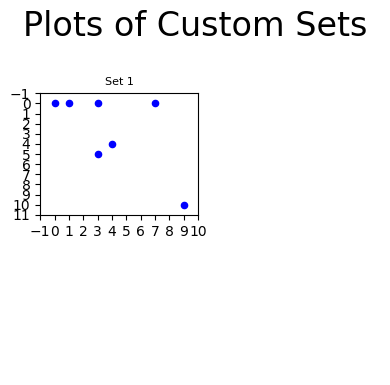

In [ ]:
import matplotlib.pyplot as plt


my_sets = [
     [(0,0), (1, 0), (3, 0), (7, 0), (3, 5), (4, 4), (9, 10)]
]

n_sets = len(my_sets)
grid_size = int(n_sets**0.5) + 1
fig, axs = plt.subplots(grid_size, grid_size, figsize=(2*grid_size, 2*grid_size))
axs = axs.flatten()
fig.suptitle("Plots of Custom Sets", fontsize=24)



for i, winner in enumerate(my_sets):
    ax = axs[i]
    x_vals = [t[0] for t in winner]
    y_vals = [t[1] for t in winner]

    ax.scatter(x_vals, y_vals, c='blue', s=20)
    ax.set_title(f"Set {i+1}", fontsize=8)


    x_min, x_max = min(x_vals, default=0), max(x_vals, default=1)
    y_min, y_max = min(y_vals, default=0), max(y_vals, default=1)

    ax.set_xlim(x_min - 1, x_max + 1)
    ax.set_ylim(y_min - 1, y_max + 1)

    ax.set_xticks(range(x_min - 1, x_max + 2))
    ax.set_yticks(range(y_min - 1, y_max + 2))
    ax.invert_yaxis()


for j in range(n_sets, len(axs)):
    axs[j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

In [ ]:
winners925

NameError: name 'winners925' is not defined